<a href="https://colab.research.google.com/github/IgorMinozzoCeratto/Igor_e_Alex/blob/main/trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colunas disponíveis: ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
Análise concluída com sucesso.


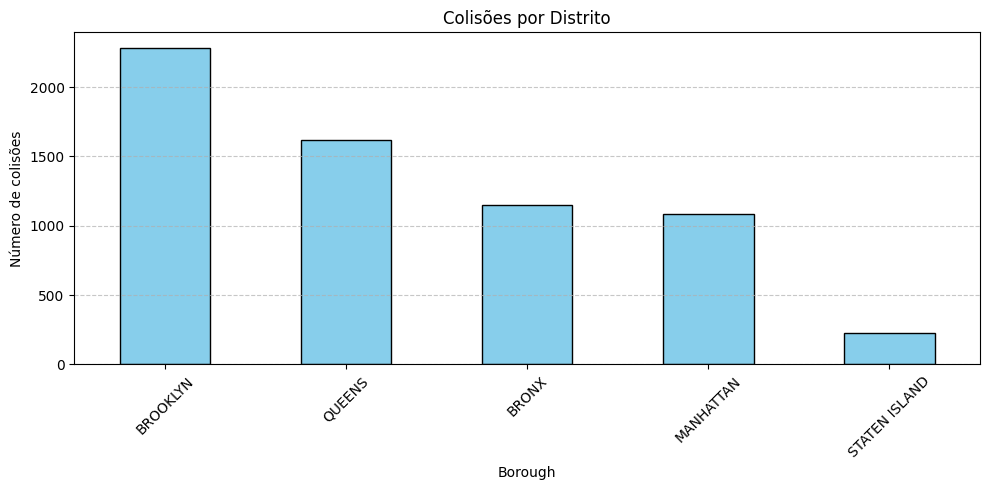

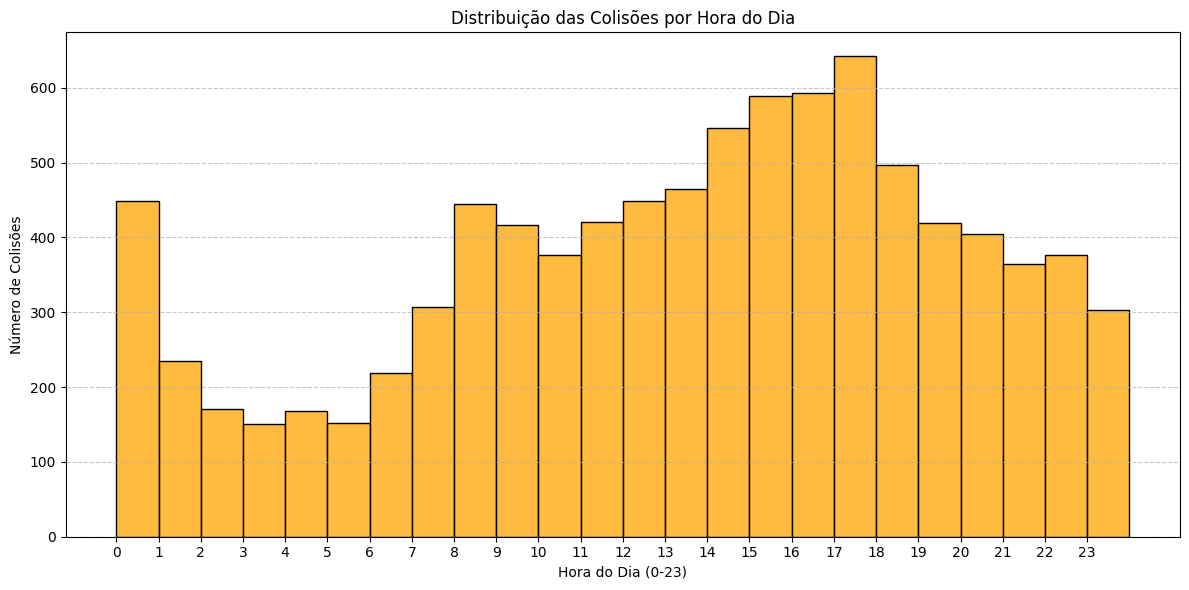

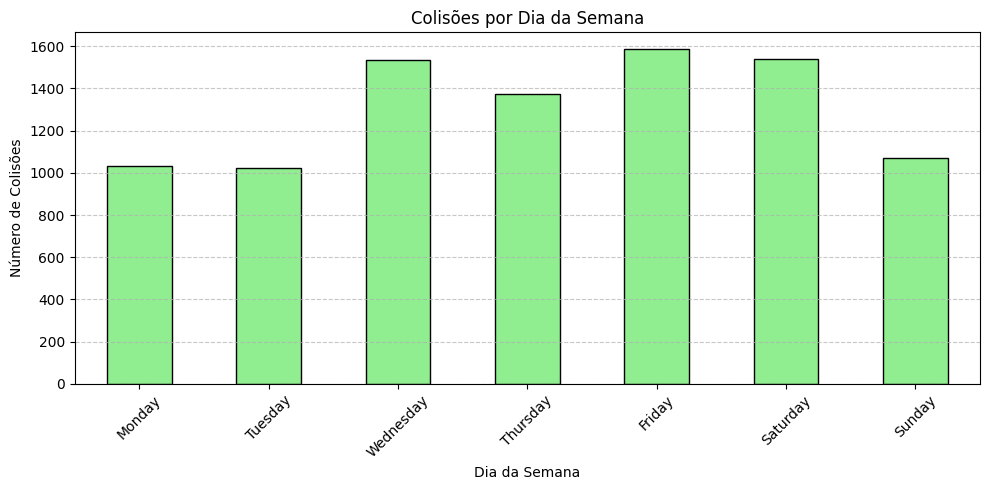

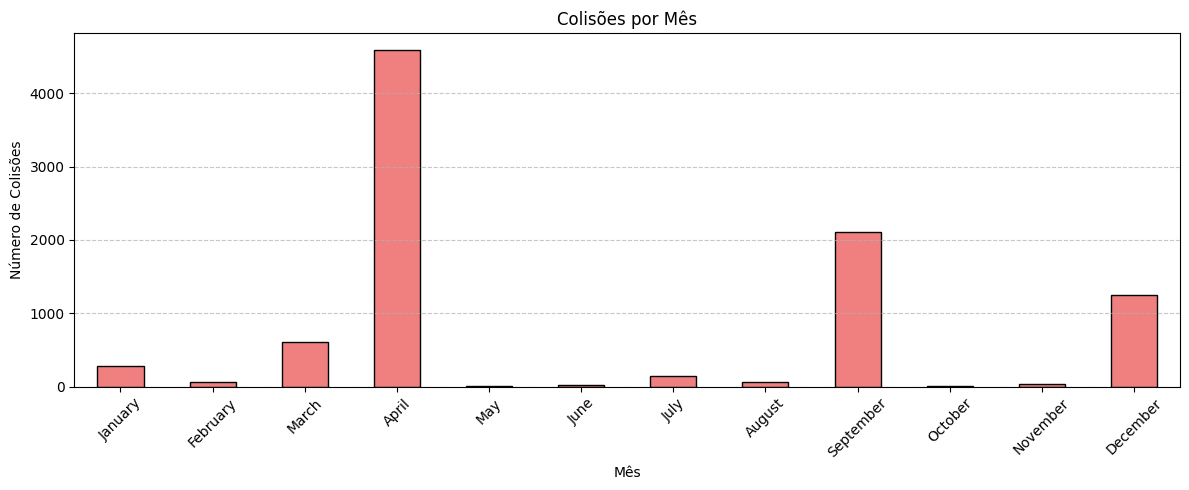

In [2]:
# -*- coding: utf-8 -*-
"""Untitled

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1pyHOaMyaOFBqfhch77wHV33ovbIpxeBo
"""

# NYC Motor Vehicle Collisions - Data Science Project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster

# 1. Load dataset (limit rows to avoid memory issues)
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv", nrows=10000, low_memory=False)

# Verifica o nome exato das colunas
print("Colunas disponíveis:", df.columns.tolist())

# Ajustar nomes se necessário (ex: espaços, capitalização)
df.columns = df.columns.str.strip().str.upper()

# 2. Clean data
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce')

# Drop rows without location e evitar SettingWithCopyWarning
df = df.dropna(subset=['LATITUDE', 'LONGITUDE']).copy()

# 3. Feature engineering: Extract hour, day of week, month
df.loc[:, 'HOUR'] = df['CRASH TIME'].dt.hour
df.loc[:, 'WEEKDAY'] = df['CRASH DATE'].dt.day_name()
df.loc[:, 'MONTH'] = df['CRASH DATE'].dt.month_name()

# 4. Visualizations
plt.figure(figsize=(10,5))
df['BOROUGH'].value_counts().plot(kind='bar', title='Colisões por Distrito', color='skyblue', edgecolor='black')
plt.xlabel("Borough")
plt.ylabel("Número de colisões")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("colisoes_por_distrito.png")

# Gráfico de colisões por hora aprimorado
plt.figure(figsize=(12,6))
sns.histplot(df['HOUR'].dropna().astype(int), bins=range(0, 25), kde=False, color='orange', edgecolor='black')
plt.title('Distribuição das Colisões por Hora do Dia')
plt.xlabel('Hora do Dia (0-23)')
plt.ylabel('Número de Colisões')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("colisoes_por_hora.png")

# Gráfico de colisões por dia da semana
plt.figure(figsize=(10,5))
df['WEEKDAY'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Colisões por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Colisões')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("colisoes_por_dia_semana.png")

# Gráfico de colisões por mês
plt.figure(figsize=(12,5))
df['MONTH'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Colisões por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Colisões')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("colisoes_por_mes.png")

# 5. Clustering: Agrupamento de locais de colisão
coords = df[['LATITUDE', 'LONGITUDE']]
kmeans = KMeans(n_clusters=5, random_state=0)
df['CLUSTER'] = kmeans.fit_predict(coords)

# 6. Salvar resultados
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['LATITUDE', 'LONGITUDE'])
cluster_centers.to_csv("cluster_centros.csv", index=False)
df[['LATITUDE', 'LONGITUDE', 'CLUSTER']].to_csv("colisoes_com_clusters.csv", index=False)

# 7. Mapa com clusters
mapa = folium.Map(location=[df['LATITUDE'].mean(), df['LONGITUDE'].mean()], zoom_start=11)
cluster_map = MarkerCluster().add_to(mapa)

for _, row in df.sample(1000).iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"Cluster: {row['CLUSTER']}"
    ).add_to(cluster_map)

mapa.save("mapa_colisoes.html")

print("Análise concluída com sucesso.")